In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Predictive analytics

In [41]:
xls = pd.ExcelFile('deliveries.xlsx')

In [42]:
deliveries = pd.read_excel(xls, '2_months_deliverys_2013', usecols='A:D, F:H, J,K,L,O')

In [43]:
deliveries.dropna(inplace=True)

In [44]:
deliveries = deliveries[(deliveries['ContainerNo'] != 'CANCELLED') & (deliveries['ContainerNo'] != 'REJECTED')]

In [45]:
deliveries = deliveries.rename(columns={'Container type and size ':'ContainerTypeSize', 'Port_Long ':'Port_Long', 'Port_Lat ': 'Port_Lat', 'City_Lat ': 'City_Lat', 'Time':'TimeStamp'})

In [157]:
dates = pd.date_range(deliveries['TimeStamp'].dt.date.min(), deliveries['TimeStamp'].dt.date.max())

In [645]:
dates

DatetimeIndex(['2013-01-17', '2013-01-18', '2013-01-19', '2013-01-20',
               '2013-01-21', '2013-01-22', '2013-01-23', '2013-01-24',
               '2013-01-25', '2013-01-26', '2013-01-27', '2013-01-28',
               '2013-01-29', '2013-01-30', '2013-01-31', '2013-02-01',
               '2013-02-02', '2013-02-03', '2013-02-04', '2013-02-05',
               '2013-02-06', '2013-02-07', '2013-02-08', '2013-02-09',
               '2013-02-10', '2013-02-11', '2013-02-12', '2013-02-13',
               '2013-02-14', '2013-02-15', '2013-02-16', '2013-02-17',
               '2013-02-18', '2013-02-19', '2013-02-20', '2013-02-21',
               '2013-02-22', '2013-02-23', '2013-02-24', '2013-02-25',
               '2013-02-26', '2013-02-27', '2013-02-28', '2013-03-01',
               '2013-03-02', '2013-03-03', '2013-03-04', '2013-03-05',
               '2013-03-06', '2013-03-07', '2013-03-08', '2013-03-09',
               '2013-03-10', '2013-03-11', '2013-03-12', '2013-03-13',
      

## Exports

In [47]:
exports = deliveries[deliveries['Import or Export'] == 'Export']

In [48]:
exports['Date'] = exports['TimeStamp'].dt.date
exports['Date'] = pd.to_datetime(exports['Date'])

In [49]:
exports = exports[['ContainerNo', 'ContainerTypeSize', 'Import or Export', 'TimeStamp', 'Date', 'Port', 'Port_Long', 'Port_Lat', 'City', 'City_Long', 'City_Lat', 'Job No']] 

In [87]:
exports.head()

,ContainerNo,ContainerTypeSize,Import or Export,TimeStamp,Date,Port,Port_Long,Port_Lat,City,City_Long,City_Lat,Job No
33298,MSCU7838835,40HC,Export,2013-01-25 13:00:00,2013-01-25,Liverpool,-3.0194,53.4663,Liverpool,-2.9689,53.3996,30928490
33300,TTNU9306941,40HC,Export,2013-02-17 06:30:00,2013-02-17,Felixstowe,1.3141,51.9591,Liverpool,-2.9689,53.3996,31151560
33301,TCNU8743409,40HC,Export,2013-02-17 12:45:00,2013-02-17,Felixstowe,1.3141,51.9591,Liverpool,-2.9689,53.3996,31151810
33302,MEDU8521604,40HC,Export,2013-02-25 08:00:00,2013-02-25,Liverpool,-3.0194,53.4663,Liverpool,-2.9689,53.3996,31209250
33303,GLDU0807143,40HC,Export,2013-02-24 07:00:00,2013-02-24,Felixstowe,1.3141,51.9591,Liverpool,-2.9689,53.3996,31221380


In [94]:
type(exports['City'].unique())

numpy.ndarray

In [111]:
exp_df = pd.DataFrame(columns = exports['City'].unique()) 
# exp_df['Date']= pd.to_datetime(dates) # Create a dataframe with the dates in the index

In [116]:
exp_df['Date']= pd.to_datetime(dates)
exp_df.set_index('Date', inplace=True)
exp_df.head()

,Liverpool,Ipswich,Immingham,Dumbarton,Dalmuir,Doncaster,Dagenham,Darlaston,Edinburgh,Corby,...,Chippenham,Newport Pagnell,Robertsbridge,Rugeley,Salford,Swanley,Thatcham,Wrexham,Aberdare,Holt
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
container_group_by_date = exports.groupby(['ContainerTypeSize', 'Date', 'City']).size()
container_group_by_date

ContainerTypeSize  Date        City         
20DV               2013-01-17  Ampthill         12
                               Ashbourne         1
                               Bardon            1
                               Barnsley          2
                               Basildon          1
                                                ..
40OT               2013-03-08  Coalville         1
                               Daventry          1
                   2013-03-11  Leicester         1
                   2013-03-14  Aberdeen          1
                               Brierley Hill     1
Length: 10195, dtype: int64

In [152]:
container_group_by_date['20DV']

Date        City           
2013-01-17  Ampthill           12
            Ashbourne           1
            Bardon              1
            Barnsley            2
            Basildon            1
                               ..
2013-03-15  Wisbech             3
            Worksop             2
2013-03-16  Hemel Hempstead     1
            Ilkeston            5
            Luton               1
Length: 3080, dtype: int64

In [164]:
container_group_by_date['20DV']['2013-01-17']['London']

2

In [159]:
container_group_by_date['20DV'].unstack().head()

City,Ampthill,Ashbourne,Bardon,Barnsley,Basildon,Bawtry,Bellshill,Birmingham,Bloxwich,Brixworth,...,Bury,Bushey,Eastbourne,Highbury,Meltham,Nelson,Potters Bar,Snodland,Weybridge,Wickford
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-17,12.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-18,12.0,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
export_20DV_mat = exp_df.copy()
# np.where(container_group_by_date['20DV'][])


,Liverpool,Ipswich,Immingham,Dumbarton,Dalmuir,Doncaster,Dagenham,Darlaston,Edinburgh,Corby,...,Chippenham,Newport Pagnell,Robertsbridge,Rugeley,Salford,Swanley,Thatcham,Wrexham,Aberdare,Holt
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
toy_df = pd.DataFrame(columns=['a','b','c','d'], index=[1,2,3])
toy_df

,a,b,c,d
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


In [202]:
toy_df.loc[1]['c']=10
toy_df

,a,b,c,d
1,NaN,NaN,10,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


In [210]:
def get_df(df, group):
    mat = np.zeros(export_20DV_mat.shape)
    new_df = pd.DataFrame(mat, index=df.index, columns=list(df.columns))
    for row in df.index:
        for col in df.columns:
            try:
                new_df.loc[row][col]=group[row][col]
            except KeyError:
                    continue
    return new_df 

In [713]:
ex_40HC_mat = get_df(exp_df, container_group_by_date['40HC'])

In [714]:
ex_40DV_mat = get_df(exp_df, container_group_by_date['40DV'])

In [715]:
ex_20DV_mat = get_df(exp_df, container_group_by_date['20DV'])

In [716]:
ex_40HR_mat = get_df(exp_df, container_group_by_date['40HR'])

In [717]:
ex_20RE_mat = get_df(exp_df, container_group_by_date['20RE'])

In [718]:
ex_40OT_mat = get_df(exp_df, container_group_by_date['40OT'])

In [719]:
ex_20OT_mat = get_df(exp_df, container_group_by_date['20OT'])

In [720]:
ex_40FL_mat = get_df(exp_df, container_group_by_date['40FL'])

In [721]:
ex_20FL_mat = get_df(exp_df, container_group_by_date['20FL'])

In [709]:
exports['ContainerTypeSize'].unique()

array(['40HC', '40DV', '20DV', '40HR', '20RE', '40OT', '20OT', '40FL',
       '20FL'], dtype=object)

In [749]:
ex_20DV_mat.head()

,Liverpool,Ipswich,Immingham,Dumbarton,Dalmuir,Doncaster,Dagenham,Darlaston,Edinburgh,Corby,...,Chippenham,Newport Pagnell,Robertsbridge,Rugeley,Salford,Swanley,Thatcham,Wrexham,Aberdare,Holt
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-17,1.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-18,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2013-01-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-21,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [753]:
ex_20DV_mat['Liverpool'].ewm(span=3, adjust=True).mean().values

array([1.        , 1.        , 0.42857143, 0.2       , 0.09677419,
       0.04761905, 0.02362205, 0.01176471, 0.50684932, 0.25317693,
       0.12652662, 0.06324786, 0.03162007, 0.01580907, 0.50791955,
       0.2539559 , 0.12697698, 0.06348825, 1.03174597, 1.51587345,
       1.2579366 , 1.62896839, 1.81448422, 0.90724205, 0.45362101,
       1.22681052, 1.11340526, 1.05670263, 0.52835131, 1.76417566,
       0.88208783, 0.44104391, 0.72052196, 0.36026098, 0.68013049,
       0.84006524, 0.92003262, 0.96001631, 0.48000816, 1.74000408,
       1.87000204, 1.43500102, 0.71750051, 1.35875025, 0.67937513,
       0.33968756, 0.66984378, 0.83492189, 0.41746095, 1.70873047,
       1.35436524, 0.67718262, 0.33859131, 0.16929565, 0.08464783,
       0.54232391, 0.77116196, 1.88558098, 0.94279049])

In [869]:
def get_stack(city, mat):
    weekdays = ex_20DV_mat.index.weekday.values
    weekofyear = ex_20DV_mat.index.weekofyear.values
    dayofyear = ex_20DV_mat.index.dayofyear.values
    day = ex_20DV_mat.index.day.values
    ma_3 = mat[city].ewm(span=7, adjust=True).mean().values
    ma_15 = mat[city].ewm(span=15, adjust=True).mean().values
    target = mat[city].values
    stack = np.stack((weekdays, weekofyear, dayofyear, day, ma_3, ma_15, target), axis=1)
    return stack

def get_train_test(stack):
    train = stack[:-1]
    test = stack[-1][:-1]
    return train, test

In [888]:
def rf_predict(train, test_val):
    train = np.array(train)
    X, y = train[:, :-1], train[:, -1]
    model = RandomForestRegressor(n_estimators = 1000)
    model.fit(X, y)

    test_val = test[0,:-1].reshape(1,-1)
    pred = model.predict(test_val)

    return int(pred)

def get_predictions(mat):
    train, test = get_train_test(get_stack(city, mat))
    return rf_predict(train, test)

In [890]:
ex_20DV_mat.columns

Index(['Liverpool', 'Ipswich', 'Immingham', 'Dumbarton', 'Dalmuir',
       'Doncaster', 'Dagenham', 'Darlaston', 'Edinburgh', 'Corby',
       ...
       'Chippenham', 'Newport Pagnell', 'Robertsbridge', 'Rugeley', 'Salford',
       'Swanley', 'Thatcham', 'Wrexham', 'Aberdare', 'Holt'],
      dtype='object', length=884)

In [889]:
get_prediction('London', ex_20DV_mat)

3

In [855]:
ex_20DV_mat['London'].values.shape

(59,)

In [857]:
lon_stack =  get_stack('London', ex_20DV_mat)
lon_stack.shape

(59, 7)

In [863]:
lon_stack[:-1].shape

(58, 7)

In [870]:
tra, tes = get_train_test(lon_stack)
tra.shape

(58, 7)

In [871]:
tes

array([ 5.        , 11.        , 75.        , 16.        ,  6.75250913,
        5.52806499])

In [873]:
rf_predict(tra, tes)

3

In [778]:
arr1, arr2 = np.array([1,2,3]), np.array([4,5,6]) 
np.stack((arr1,arr2), axis=1)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [398]:
def plot_chart(city_name):

    ma_3 = ex_20DV_mat[city_name].ewm(span=3, adjust=True).mean()
    ma_15 = ex_20DV_mat[city_name].ewm(span=15, adjust=True).mean()

    plt.figure(figsize=(12.2, 4.5))
    plt.plot(ex_20DV_mat.index, ex_20DV_mat[city_name], label=city_name + 'export 20DV', marker='o')
    plt.plot(ex_20DV_mat.index, ma_3, label=city_name + 'ma3', color='purple')
    plt.plot(ex_20DV_mat.index, ma_10, label=city_name + 'ma10')
    plt.title(city_name + ' 20DV export')
    plt.xlabel('Date')
    plt.ylabel('Qty')
    plt.show()


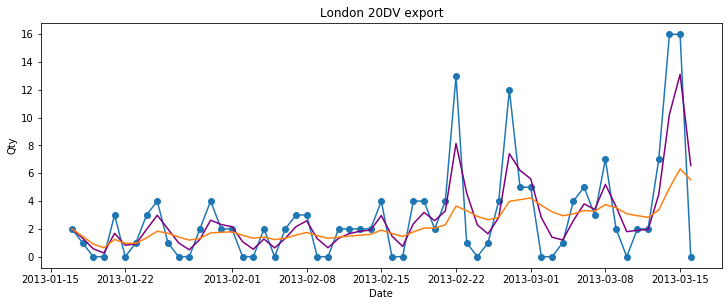

In [399]:
plot_chart('London')

In [642]:
new_df = pd.DataFrame(ex_20DV_mat['London'])
new_df['weekday'] = new_df.index.weekday 
new_df['weekofyear'] = new_df.index.weekofyear
new_df['dayofyear'] = new_df.index.dayofyear
new_df['dayofmonth'] = new_df.index.day

In [685]:
def make_pred_df(mat, city):
    d = pd.DataFrame(mat[city],index=dates)
    d.index.set_names('Date', inplace=True)
    d['weekday'] = d.index.weekday
    d['weekofyear'] = d.index.weekofyear
    d['dayofyear'] = d.index.dayofyear
    d['dayofmonth'] = d.index.day
    d['ma7days'] = d[city].ewm(span=7, adjust=True).mean()
    d['ma15days'] = d[city].ewm(span=15, adjust=True).mean()
    d[str(city)] = mat[city]
    d = d[['weekday', 'weekofyear', 'dayofyear', 'dayofmonth', 'ma7days', 'ma15days', str(city)]]
    
    return d

In [741]:
dfg = make_pred_df(ex_20DV_mat, 'London')

In [816]:
dfg.tail()

,weekday,weekofyear,dayofyear,dayofmonth,ma7days,ma15days,London
Date,,,,,,,
2013-03-12,1,11,71,12,2.415337,2.831224,2.0
2013-03-13,2,11,72,13,3.561503,3.352616,7.0
2013-03-14,3,11,73,14,6.671127,4.934322,16.0
2013-03-15,4,11,74,15,9.003346,6.318131,16.0
2013-03-16,5,11,75,16,6.752509,5.528065,0.0


In [729]:
train, test = train_test_split(dfg, 0.20)

In [730]:
X, y = train[:, :-1], train[:, -1]

In [731]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [732]:
model = RandomForestRegressor(n_estimators = 1000)
model.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [733]:
from sklearn import tree

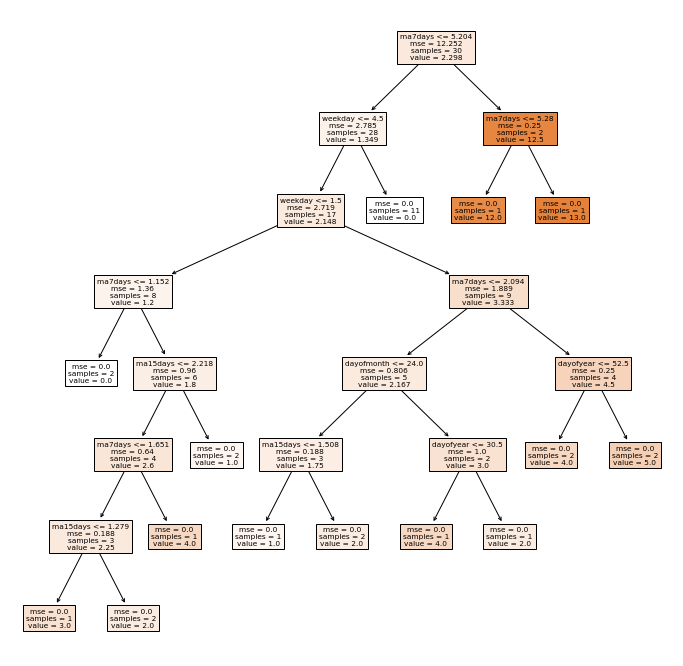

In [740]:
fn = dfg.columns[:-1]
cn = "Containers"
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12))
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True)
fig.savefig('decision_tree_vis.png')



In [510]:
new_df['ma7days'] = new_df['London'].ewm(span=7, adjust=True).mean()
new_df['ma15days'] = new_df['London'].ewm(span=15, adjust=True).mean()

In [511]:
new_df.head()

,London,weekday,weekofyear,dayofyear,dayofmonth,ma7days,ma15days
Date,,,,,,,
2013-01-17,2.0,3,3,17,17,2.000000,2.000000
2013-01-18,1.0,4,3,18,18,1.428571,1.466667
2013-01-19,0.0,5,3,19,19,0.810811,0.911243
2013-01-20,0.0,6,3,20,20,0.514286,0.635988
2013-01-21,3.0,0,4,21,21,1.329065,1.242654


In [513]:
new_df = new_df[['weekday', 'weekofyear', 'dayofyear', 'dayofmonth', 'ma7days', 'ma15days', 'London']]

In [514]:
new_df.head()

,weekday,weekofyear,dayofyear,dayofmonth,ma7days,ma15days,London
Date,,,,,,,
2013-01-17,3,3,17,17,2.000000,2.000000,2.0
2013-01-18,4,3,18,18,1.428571,1.466667,1.0
2013-01-19,5,3,19,19,0.810811,0.911243,0.0
2013-01-20,6,3,20,20,0.514286,0.635988,0.0
2013-01-21,0,4,21,21,1.329065,1.242654,3.0


In [515]:
def train_test_split(data, perc):
    data = data.values
    n = int(len(data) * (1 - perc))
    return data[:n], data[n:]

In [516]:
train, test = train_test_split(new_df, 0.2)

In [517]:
X = train[:, :-1]
y = train[:, -1]

In [518]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [526]:
def rf_predict(train, test_val):
    train = np.array(train)
    X, y = train[:, :-1], train[:, -1]
    model = RandomForestRegressor(n_estimators = 1000)
    model.fit(X, y)

    test_val = test[0,:-1].reshape(1,-1)
    pred = model.predict(test_val)

    return int(pred)

In [527]:
def walkforward_validate(data, percent_split):

    predictions = []

    train, test = train_test_split(data, percent_split)

    history = [x for x in train]

    for i in range(len(test)):
        test_X, test_y = test[:, :-1], test[:, -1]

        pred = rf_predict(history, test_X[0,:-1])
        predictions.append(pred)

        history.append(test[i])

    error = mean_absolute_error(test[:,-1], predictions)

    return error, test[:,-1], predictions

In [528]:
mean_error, y, pred = walkforward_validate(new_df, 0.2)

In [529]:
mean_error

3.8333333333333335

In [530]:
y, pred

(array([ 4.,  5.,  3.,  7.,  2.,  0.,  2.,  2.,  7., 16., 16.,  0.]),
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

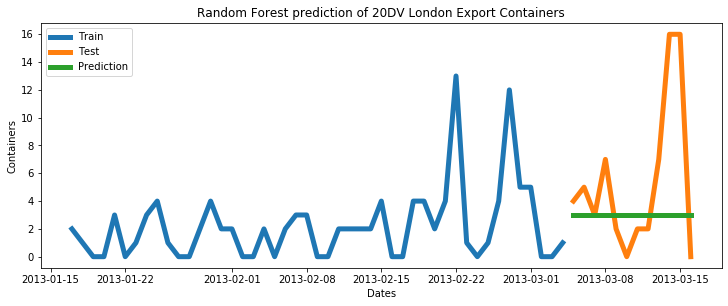

In [641]:
plt.figure(figsize=(12.2, 4.5))
# plt.plot(new_df.index, new_df['London'], label= 'London export 20DV', marker='o')
plt.plot(new_df.index[:-len(y)], new_df['London'].values[:-len(y)], label= 'Train', linewidth=5)
plt.plot(new_df.index[-len(y):], y, linewidth=5, label='Test')
plt.plot(new_df.index[-len(pred):], pred, linewidth=5, label='Prediction', alpha=1)
plt.xlabel('Dates')
plt.ylabel('Containers')
plt.title('Random Forest prediction of 20DV London Export Containers')
plt.legend()
plt.savefig('rf_pred_20DV_London', bbox_inches='tight')
plt.show()

In [726]:
scunthrope_df = make_pred_df(ex_20DV_mat, 'Scunthorpe')


In [692]:
scun_mean_error, scun_y, scun_pred = walkforward_validate(scunthrope_df, 0.2)


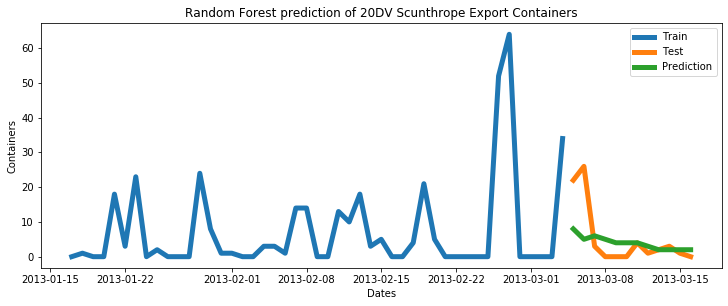

In [706]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(scunthrope_df.index[:-len(scun_y)], scunthrope_df['Scunthorpe'].values[:-len(scun_y)], label= 'Train', linewidth=5)
plt.plot(scunthrope_df.index[-len(scun_y):], scun_y, linewidth=5, label='Test')
plt.plot(scunthrope_df.index[-len(scun_pred):], scun_pred, linewidth=5, label='Prediction')
plt.xlabel('Dates')
plt.ylabel('Containers')
plt.title('Random Forest prediction of 20DV Scunthrope Export Containers')
plt.legend()
plt.savefig('rf_pred_20DV_Scunthrope', bbox_inches='tight')
plt.show()

In [705]:
scun_mean_error

4.75

In [722]:
scunthrope_df_40 = make_pred_df(ex_40HC_mat, 'Scunthorpe')

In [723]:
scun_mean_error_40HC, scun_y_40HC, scun_pred_40HC = walkforward_validate(scunthrope_df_40, 0.2)


In [748]:
np.array(np.arange(0,15).reshape(3,5))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])